# Project Title-Stores Sales Prediction

### Domain Sales & Marketing

## Problem Statement

#### Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

# Data Definition

Item_Identifier : Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### 1.Import Libraries

In [3]:
##Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

## 2.Read Data

In [5]:
df=pd.read_csv("Train.csv")

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df)

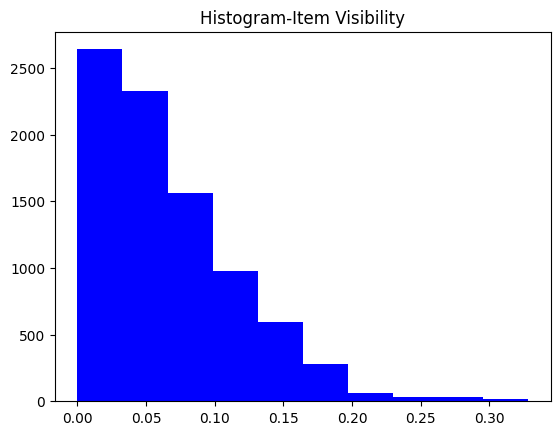

In [7]:
##Histogram
plt.hist(df.Item_Visibility,color='blue')
plt.title('Histogram-Item Visibility')
plt.show()

#### Dimensions of the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.shape

(8523, 12)

### observations

1.we can observe here we have null values in some features

2.3 different data types are there in dataset(int,float,object)

3.total 8523 rowa and 12 columns we have

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Few Observations:

The Item_Outlet_Sales has outliers.

The Item_Visibility has minimum value of 0. The Item_Visibility can't be zero. If the item has zero visibility, how can they sell the item?

Item_Weight and Item_outlet_size has missing values.

In [11]:
## First let us fix the item_visibility.
## the zeros are replaced by nun 
df.loc[df.Item_Visibility == 0.0, 'Item_Visibility'] = np.nan

### 3.Data Analysis and Preparation

#### Null Values

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot: >

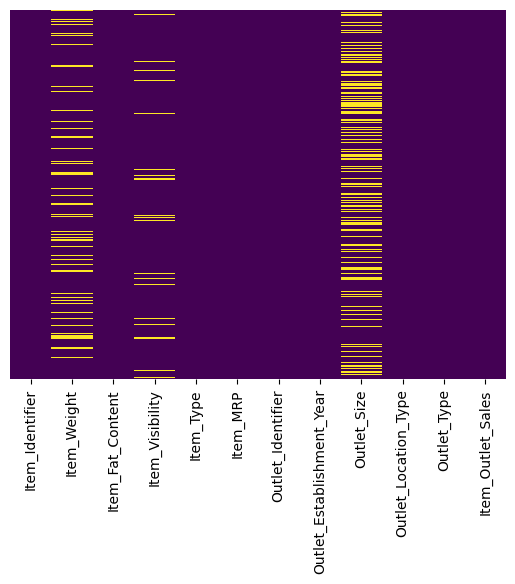

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round((df[feature].isnull().mean()*100), 4),  ' % missing values')

Item_Weight 17.1653  % missing values
Item_Visibility 6.1715  % missing values
Outlet_Size 28.2764  % missing values


In [15]:
## Selecting all object type columns
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
## Exploring Object Type Columns
for col in cat_cols:
    print("Unique Value count : ", col, '\n')
    print('Count: ', len(df[col].unique()),'\n\n')
    

Unique Value count :  Item_Identifier 

Count:  1559 


Unique Value count :  Item_Fat_Content 

Count:  5 


Unique Value count :  Item_Type 

Count:  16 


Unique Value count :  Outlet_Identifier 

Count:  10 


Unique Value count :  Outlet_Size 

Count:  4 


Unique Value count :  Outlet_Location_Type 

Count:  3 


Unique Value count :  Outlet_Type 

Count:  4 




In [17]:
## Checking the value counts of Categorical Columns
## Exploring Object Type Columns
for col in cat_cols[1:]:
    print("Value count : ", col, '\n')
    print(df[col].value_counts(),'\n\n')

Value count :  Item_Fat_Content 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


Value count :  Item_Type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 


Value count :  Outlet_Identifier 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 


Value count :  Outlet_Size 

Medium    2793
Small     2388
High       932
Name: Outlet_Siz

Observations on Categorical Columns:

1. The Item_Fat_Content has miscoded values.  We need to fix them.
2. Item_Type has many categories.  It can be combined to fewer categories, like food items, drinks, non-veg items, etc.


In [18]:
df.loc[:, 'Item_Fat_Content'] = df.loc[:, 'Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [19]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

From feature Item_Identifier we can extract some useful information about food category

In [20]:
df.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [21]:
df.loc[:, 'Item_Identifier'].apply(lambda x: x[:2]).value_counts()

## FD = food
## NC= non consumable
## DR= drinks

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [22]:
## since we have only 2 categories in 'Item_Fat_Content' based on the observations 
##from 'Item_Identifier' we have to add one more category to the 'Item_Fat_Content'ie. 'Non consumable'



df.loc[df.Item_Identifier.str.startswith('NC'), 'Item_Fat_Content'] = 'Non Consumable'

In [23]:
df.Item_Fat_Content.value_counts()

Low Fat           3918
Regular           3006
Non Consumable    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
## Creating a new column called Item_Category based on Item_Identifier
df['Item_Category'] = df.Item_Identifier.\
apply(lambda x: 'Non-Food' if (x[:2] == 'NC') else 'Drinks' if (x[:2] == 'DR') else 'Food')

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non Consumable,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food


In [26]:
## Missing values
miss_values = df.isnull().sum()
print(type(miss_values))
miss_values[miss_values > 0]

<class 'pandas.core.series.Series'>


Item_Weight        1463
Item_Visibility     526
Outlet_Size        2410
dtype: int64

In [27]:
## Getting the indexes of missing values form Outlet_size column
mv_idx = df[df.Item_Visibility.isnull()].index.to_list()
mv_idx[:5]

[3, 4, 5, 10, 32]

In [28]:
import datetime as dt

print(dt.datetime.today().year)

2023


In [29]:
# we have 'Outlet_Establishment_Year' from this we can find the 
# age of the out let which will become use full feature for
# the model learning


df['Outlet_year'] = dt.datetime.today().year - df.Outlet_Establishment_Year

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Non Consumable,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food,36


In [31]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Non Consumable,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Food,36


In [33]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [34]:
df.groupby('Outlet_Type')['Outlet_Size'].count()

Outlet_Type
Grocery Store         528
Supermarket Type1    3722
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Size, dtype: int64

In [35]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [36]:
## Getting the indexes of missing values form Outlet_size column
mv_idx_Outlet_Size = df[df.Outlet_Size.isnull()].index.to_list()
mv_idx_Outlet_Size

[3,
 8,
 9,
 25,
 28,
 30,
 33,
 45,
 46,
 47,
 53,
 54,
 56,
 61,
 65,
 67,
 68,
 72,
 73,
 78,
 79,
 85,
 90,
 92,
 100,
 107,
 111,
 114,
 116,
 118,
 120,
 121,
 122,
 124,
 127,
 129,
 133,
 137,
 138,
 139,
 141,
 142,
 150,
 157,
 158,
 165,
 166,
 171,
 174,
 175,
 176,
 177,
 179,
 181,
 188,
 192,
 200,
 202,
 205,
 207,
 209,
 212,
 213,
 214,
 215,
 216,
 217,
 221,
 223,
 232,
 240,
 241,
 243,
 249,
 254,
 256,
 258,
 259,
 262,
 263,
 264,
 268,
 277,
 278,
 283,
 286,
 290,
 292,
 298,
 304,
 305,
 306,
 315,
 316,
 317,
 318,
 322,
 323,
 325,
 327,
 329,
 332,
 337,
 338,
 339,
 343,
 351,
 362,
 367,
 369,
 372,
 383,
 387,
 391,
 394,
 399,
 401,
 411,
 415,
 418,
 419,
 420,
 421,
 428,
 429,
 437,
 442,
 448,
 453,
 461,
 463,
 467,
 468,
 470,
 471,
 477,
 478,
 479,
 483,
 486,
 492,
 493,
 499,
 500,
 502,
 503,
 507,
 510,
 511,
 513,
 515,
 516,
 521,
 522,
 524,
 528,
 529,
 531,
 532,
 534,
 540,
 541,
 547,
 548,
 554,
 555,
 558,
 559,
 561,
 566,
 569,
 

In [37]:
## Identifying the location and Outlet Types of missing Outlet Size rows.

df.loc[mv_idx,].groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          30
                      Supermarket Type1  Medium         53
                                         Small          61
Tier 2                Supermarket Type1  Small          54
Tier 3                Supermarket Type1  High           59
                      Supermarket Type2  Medium         65
                      Supermarket Type3  Medium         60
Name: Outlet_Size, dtype: int64

Based on our analysis on Outlet_Size, we found out that all the missing outlet_size values are belongs to 'Small'. So, let us fill the missing values with 'Small' outlet size.


Since imputing null values with "small", we are not getting good accuracy so we can fill the null values with the mode of 'outlet_size'

In [38]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [39]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [40]:
## Getting the indexes of missing values form Outlet_size column
mv_idx_Outlet_Size = df[df.Outlet_Size.isnull()].index.to_list()
mv_idx_Outlet_Size

[]

In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
Outlet_year                     0
dtype: int64

### Working on Item_Weight missing values

In [42]:
df.loc[mv_idx, :].groupby('Outlet_Size')['Item_Weight'].size()

Outlet_Size
High       59
Medium    322
Small     145
Name: Item_Weight, dtype: int64

In [43]:
item_wt = df.groupby(['Item_Category','Outlet_Size'])['Item_Weight'].mean()
item_wt

Item_Category  Outlet_Size
Drinks         High           12.324195
               Medium         11.978789
               Small          12.167943
Food           High           12.910068
               Medium         12.822976
               Small          12.814502
Non-Food       High           13.690722
               Medium         13.294762
               Small          13.317636
Name: Item_Weight, dtype: float64

In [44]:
item_wt[('Food','Small')]

12.814502245508981

In [45]:
mv_idx

[3,
 4,
 5,
 10,
 32,
 33,
 46,
 60,
 72,
 79,
 107,
 114,
 144,
 156,
 175,
 212,
 214,
 216,
 219,
 228,
 307,
 349,
 370,
 379,
 386,
 388,
 411,
 423,
 447,
 472,
 478,
 482,
 499,
 500,
 505,
 520,
 535,
 545,
 559,
 576,
 596,
 600,
 602,
 613,
 623,
 633,
 651,
 677,
 687,
 722,
 737,
 741,
 747,
 781,
 791,
 792,
 801,
 802,
 838,
 840,
 844,
 900,
 906,
 943,
 955,
 968,
 1063,
 1074,
 1094,
 1113,
 1118,
 1120,
 1143,
 1145,
 1146,
 1179,
 1197,
 1212,
 1243,
 1263,
 1292,
 1326,
 1335,
 1346,
 1350,
 1351,
 1390,
 1391,
 1405,
 1418,
 1450,
 1454,
 1463,
 1467,
 1472,
 1483,
 1486,
 1505,
 1508,
 1511,
 1537,
 1585,
 1623,
 1633,
 1636,
 1643,
 1649,
 1665,
 1691,
 1693,
 1727,
 1758,
 1760,
 1761,
 1768,
 1782,
 1809,
 1851,
 1862,
 1893,
 1898,
 1913,
 1953,
 1972,
 2007,
 2018,
 2022,
 2053,
 2055,
 2062,
 2138,
 2192,
 2217,
 2249,
 2330,
 2331,
 2340,
 2347,
 2376,
 2381,
 2394,
 2397,
 2469,
 2484,
 2521,
 2522,
 2545,
 2547,
 2551,
 2561,
 2590,
 2606,
 2638,
 2644,
 

In [46]:
df.loc[mv_idx,['Item_Category','Outlet_Size','Item_Weight']].head()

,Item_Category,Outlet_Size,Item_Weight
3,Food,Medium,19.200
4,Non-Food,High,8.930
5,Food,Medium,10.395
10,Food,Medium,11.800
32,Food,Medium,18.700


In [47]:
df.loc[mv_idx, 'Item_Weight'] = df.loc[mv_idx,['Item_Category','Outlet_Size']].\
apply(lambda x: item_wt[(x[0],x[1])], axis=1)

In [48]:
df.loc[mv_idx, 'Item_Weight']

3       12.822976
4       13.690722
5       12.822976
10      12.822976
32      12.822976
          ...    
8480    12.814502
8484    12.324195
8486    12.822976
8494    13.294762
8500    13.294762
Name: Item_Weight, Length: 526, dtype: float64

In [49]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1373
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
Outlet_year                     0
dtype: int64

### Imputing Item_visibility with Iterative Imputer

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [51]:
imp = IterativeImputer(max_iter=20, verbose = 1, random_state=0)

In [52]:
num_df = df.select_dtypes(exclude='object')
num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year
0,9.300000,0.016047,249.8092,1999,3735.1380,24
1,5.920000,0.019278,48.2692,2009,443.4228,14
2,17.500000,0.016760,141.6180,1999,2097.2700,24
3,12.822976,NaN,182.0950,1998,732.3800,25
4,13.690722,NaN,53.8614,1987,994.7052,36


In [53]:
num_df.loc[mv_idx, 'Item_Visibility'].head()

3    NaN
4    NaN
5    NaN
10   NaN
32   NaN
Name: Item_Visibility, dtype: float64

In [54]:
imp.fit(num_df)

[IterativeImputer] Completing matrix with shape (8523, 6)
[IterativeImputer] Change: 0.2264160121435168, scaled tolerance: 13.0869648 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(max_iter=20, random_state=0, verbose=1)

In [55]:
df1 = pd.DataFrame(imp.transform(num_df), columns = num_df.columns)

[IterativeImputer] Completing matrix with shape (8523, 6)


In [56]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0
...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5218,1987.0,2778.3834,36.0
8519,8.380000,0.046982,108.1570,2002.0,549.2850,21.0
8520,10.600000,0.035186,85.1224,2004.0,1193.1136,19.0
8521,7.210000,0.145221,103.1332,2009.0,1845.5976,14.0


In [57]:
df1.loc[mv_idx,'Item_Weight'].head()

3     12.822976
4     13.690722
5     12.822976
10    12.822976
32    12.822976
Name: Item_Weight, dtype: float64

In [58]:
df1.shape

(8523, 6)

In [59]:
df1.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Outlet_year                  0
dtype: int64

## Combining numerical and categorical data after imputing the missing values

In [60]:
df = pd.concat([df1, df.select_dtypes(include = 'object')], axis= 1)

In [61]:
df.shape

(8523, 14)

In [62]:
df.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Outlet_year                  0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Category                0
dtype: int64

In [63]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food


In [64]:
df.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Outlet_year                  0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Category                0
dtype: int64

<AxesSubplot: >

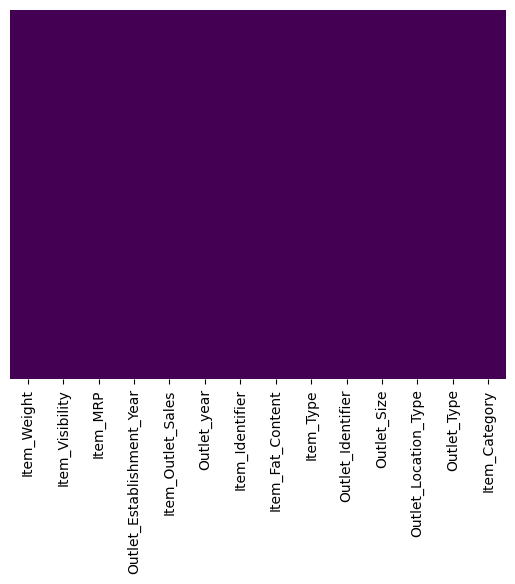

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Analysing Target Variable

Text(0.5, 1.0, 'Histogram-Item outlet sales')

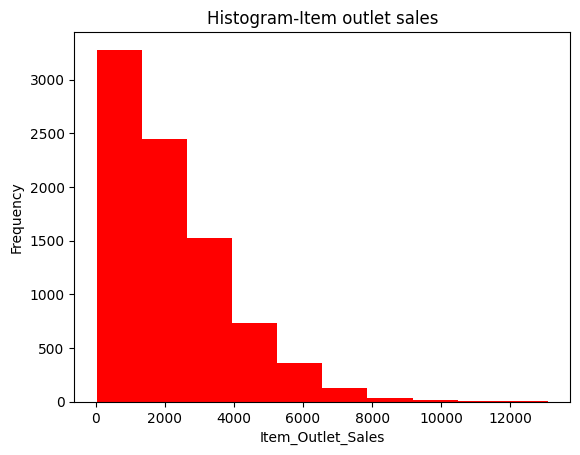

In [66]:
##Histogram

plt.hist(df.Item_Outlet_Sales,color='red')

plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.title('Histogram-Item outlet sales')

In [67]:
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### From the above statistical description we can clearly understnad There is a huge difference of Sales at minimum,1st qunatile, 3rd Quantile and maximum.

### Box Plot

<AxesSubplot: >

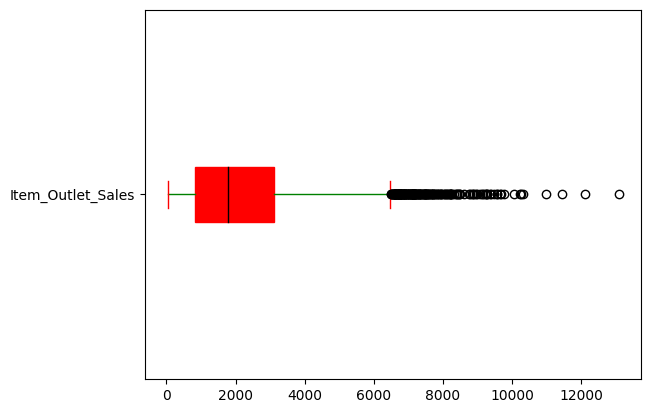

In [68]:
props2= dict(boxes='red', whiskers='green', medians='black', caps='red' )
df.Item_Outlet_Sales.plot.box(color=props2,patch_artist=True,vert=False)

#### Outliers Identification

In [69]:
IQR=df.Item_Outlet_Sales.quantile(0.75)-df.Item_Outlet_Sales.quantile(0.25)
LL=df.Item_Outlet_Sales.quantile(0.25)-(1.5*IQR)
UL=df.Item_Outlet_Sales.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  2267.049
LL:  -2566.3261
UL:  6501.8699


In [70]:
up_lim_len=len(df.Item_Outlet_Sales[df.Item_Outlet_Sales>UL])

up_lim_len

186

In [71]:
upperLimit_perc=up_lim_len/len(df)
upperLimit_perc

0.021823301654347062

In [72]:
df.Item_Outlet_Sales.value_counts()
print(len(df.Item_Outlet_Sales[df.Item_Outlet_Sales <0])) 
print(len(df.Item_Outlet_Sales[df.Item_Outlet_Sales >1000]))
print(len(df.Item_Outlet_Sales[df.Item_Outlet_Sales >2000])) 
print(len(df.Item_Outlet_Sales[df.Item_Outlet_Sales >7000]))

0
6019
3856
125


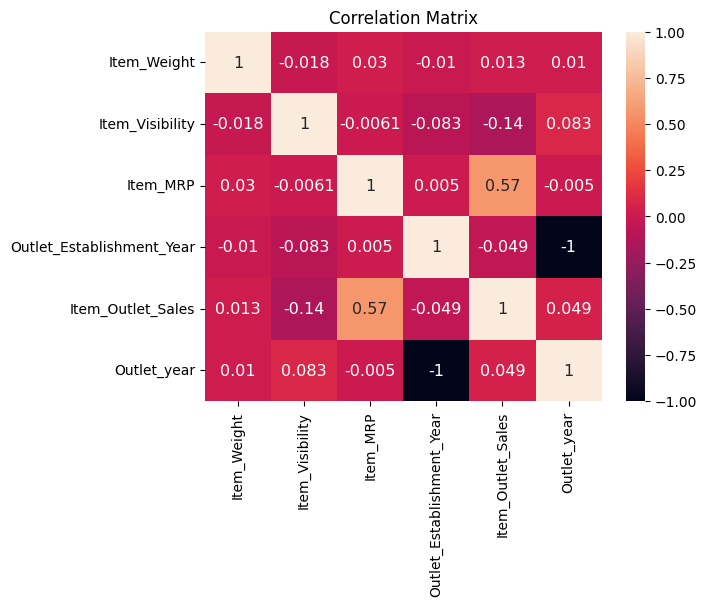

In [73]:
sns.heatmap(df.corr(),annot=True,vmax=+1,vmin=-1,annot_kws={"size":11.5})
plt.title('Correlation Matrix')
plt.show()

#### Value counts of each features 

In [74]:
for i in range(0,12):
    print(df.iloc[:,i].value_counts())
    print("*"*10)

12.822976    222
12.814502    105
17.600000     81
12.150000     77
13.650000     72
            ... 
12.732597      1
12.965864      1
12.738264      1
12.725266      1
12.828454      1
Name: Item_Weight, Length: 1797, dtype: int64
**********
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility, Length: 8405, dtype: int64
**********
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64
**********
1985.0    1463
1987.0     932
1999.0     930
1997.0     930
2004.0     930
2002.0     929
2009.0     928
2007.0     926
1998.0     555
Name: Outlet_Establishment_Year, dtype: int64
**********
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650    

In [75]:
from scipy.stats import f_oneway

In [76]:
import statsmodels.api as sm

In [77]:
from statsmodels.formula.api import ols

In [78]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   float64
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Outlet_year                8523 non-null   float64
 6   Item_Identifier            8523 non-null   object 
 7   Item_Fat_Content           8523 non-null   object 
 8   Item_Type                  8523 non-null   object 
 9   Outlet_Identifier          8523 non-null   object 
 10  Outlet_Size                8523 non-null   object 
 11  Outlet_Location_Type       8523 non-null   object 
 12  Outlet_Type                8523 non-null   object 
 13  Item_Category              8523 non-null   objec

(8523, 14)

### Item_Weight

In [79]:
df.Item_Weight.value_counts()

12.822976    222
12.814502    105
17.600000     81
12.150000     77
13.650000     72
            ... 
12.732597      1
12.965864      1
12.738264      1
12.725266      1
12.828454      1
Name: Item_Weight, Length: 1797, dtype: int64

In [80]:
df.groupby("Item_Weight")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,,,,,,,,
4.555,4.0,1761.706800,660.951300,1230.3984,1314.28920,1565.9616,2013.3792,2684.5056
4.590,4.0,1273.342500,350.389440,792.3020,1131.86000,1358.2320,1499.7145,1584.6040
4.610,6.0,2122.348467,1180.102481,174.4396,1700.78610,2354.9346,2616.5940,3663.2316
4.615,4.0,4078.025000,1117.572620,2563.3300,3611.96500,4311.0550,4777.1150,5126.6600
4.635,5.0,2184.489800,537.551557,1670.4922,1798.99160,1927.4910,2698.4874,2826.9868
...,...,...,...,...,...,...,...,...
21.000,6.0,1194.778100,310.399859,774.9912,1017.17595,1162.4868,1453.1085,1549.9824
21.100,16.0,1835.735437,1017.160196,383.5008,1031.65710,1834.2790,2456.1362,3739.1328
21.200,4.0,2716.131100,2087.067214,529.3110,1565.96160,2432.8332,3583.0027,5469.5470


#### SCATTER PLOT

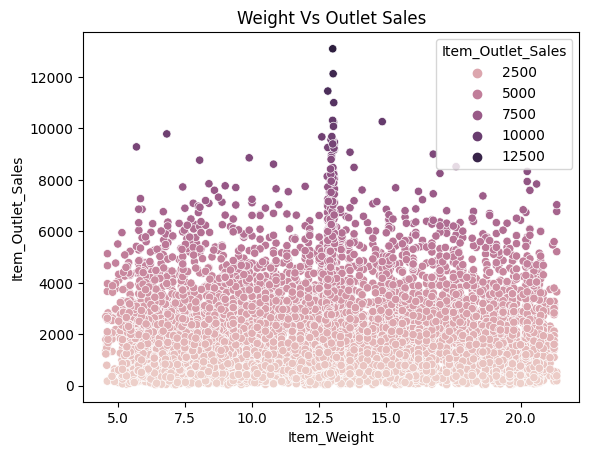

In [81]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Outlet_Sales',data=df)
plt.title("Weight Vs Outlet Sales")
plt.show()

In [82]:
df.Item_Weight.describe()

count    8523.000000
mean       12.874294
std         4.095471
min         4.555000
25%         9.695000
50%        12.834329
75%        15.750000
max        21.350000
Name: Item_Weight, dtype: float64

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

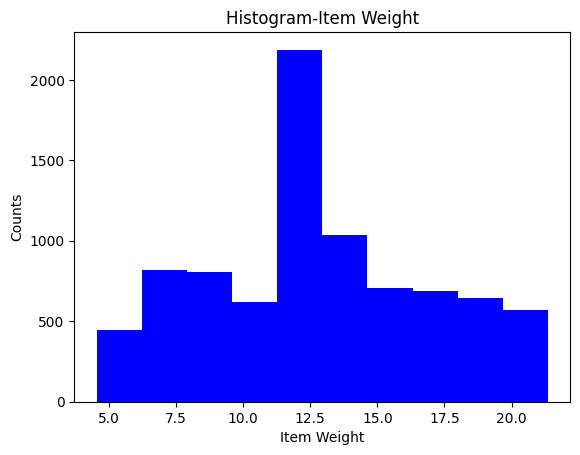

In [83]:
plt.hist(df.Item_Weight,color='blue')
plt.xlabel("Item Weight")
plt.ylabel("Counts")
plt.title('Histogram-Item Weight')
plt.show

### Box Plot

In [84]:
IQR=df.Item_Weight.quantile(0.75)-df.Item_Weight.quantile(0.25)
LL=df.Item_Weight.quantile(0.25)-(1.5*IQR)
UL=df.Item_Weight.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  6.055
LL:  0.6125000000000007
UL:  24.8325


In [85]:
len(df.Item_Weight[df.Item_Weight>UL])

0

### 3.Item_Fat_Content

In [86]:
df.Item_Fat_Content.describe()

count        8523
unique          3
top       Low Fat
freq         3918
Name: Item_Fat_Content, dtype: object

In [87]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,3918.0,2163.829268,1726.302029,33.2900,830.9184,1733.0774,3060.84905,11445.1020
Non Consumable,1599.0,2142.721364,1626.907672,33.2900,815.6050,1874.8928,3016.73980,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


### COUNTPLOT

Text(0.5, 1.0, 'Item_Fat_Content counting')

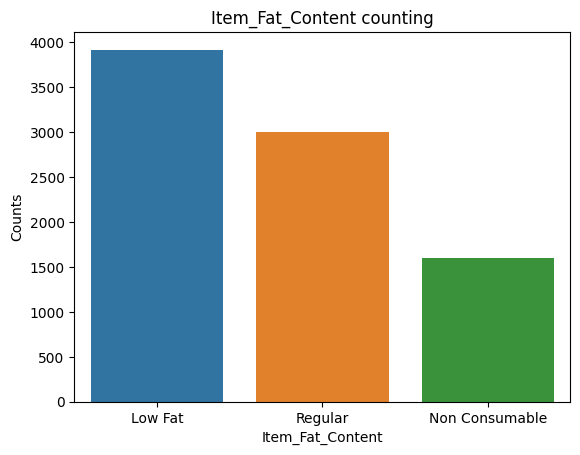

In [88]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.xlabel("Item_Fat_Content")
plt.ylabel("Counts")

plt.title("Item_Fat_Content counting")

In [89]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5218,1987.0,2778.3834,36.0,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,Food
8519,8.380000,0.046982,108.1570,2002.0,549.2850,21.0,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1,Food
8520,10.600000,0.035186,85.1224,2004.0,1193.1136,19.0,NCJ29,Non Consumable,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Non-Food
8521,7.210000,0.145221,103.1332,2009.0,1845.5976,14.0,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Food


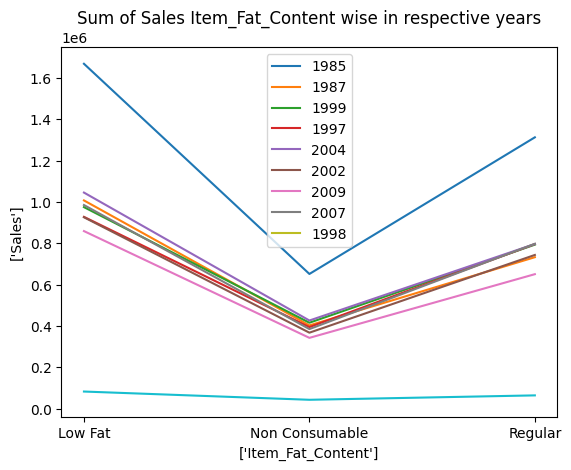

In [90]:
plt.plot(df[df.Outlet_Establishment_Year==1985].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1987].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1999].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1997].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2004].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2002].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2009].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2007].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2008].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1998].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())

plt.xlabel(['Item_Fat_Content'])
plt.ylabel(['Sales'])
plt.title('Sum of Sales Item_Fat_Content wise in respective years')
plt.legend([1985,1987,1999,1997,2004,2002,2009,2007,1998])
plt.show()


### BARPLOT

<function matplotlib.pyplot.show(close=None, block=None)>

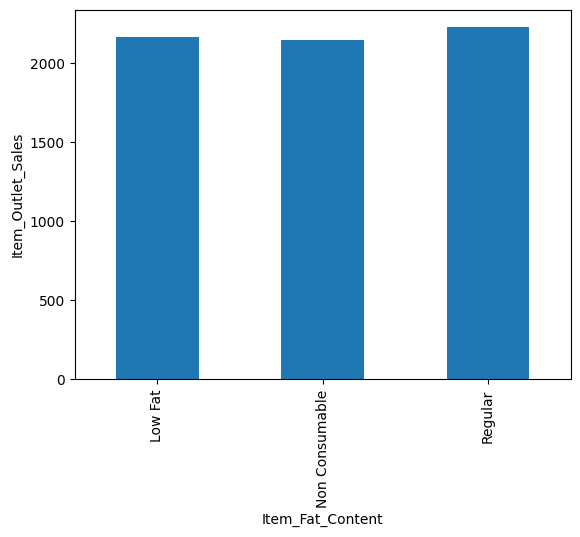

In [91]:
df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show

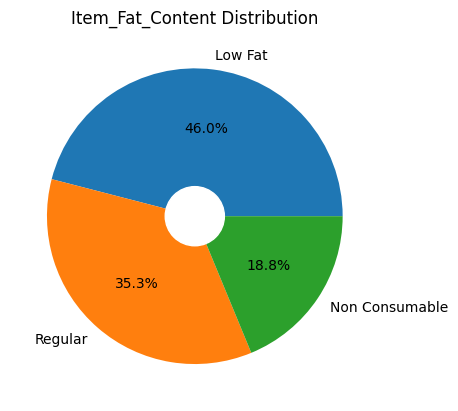

In [92]:
Frequency_by_Item=df["Item_Fat_Content"].value_counts()
keys=Frequency_by_Item.keys().to_list()
counts=Frequency_by_Item.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Item_Fat_Content Distribution")
plt.show()


In [93]:
print(Frequency_by_Item)
print (keys)
print (counts)

Low Fat           3918
Regular           3006
Non Consumable    1599
Name: Item_Fat_Content, dtype: int64
['Low Fat', 'Regular', 'Non Consumable']
[3918, 3006, 1599]


### 4.Item_Visibility

In [94]:
df.Item_Visibility.value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility, Length: 8405, dtype: int64

In [95]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.070446
std         0.048787
min         0.003575
25%         0.033082
50%         0.061156
75%         0.094696
max         0.328391
Name: Item_Visibility, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

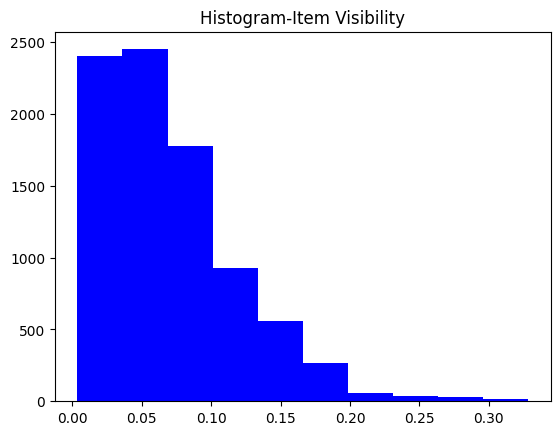

In [96]:
##Histogram
plt.hist(df.Item_Visibility,color='blue')
plt.title('Histogram-Item Visibility')
plt.show

#### BOX PLOT

In [97]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.070446
std         0.048787
min         0.003575
25%         0.033082
50%         0.061156
75%         0.094696
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot: >

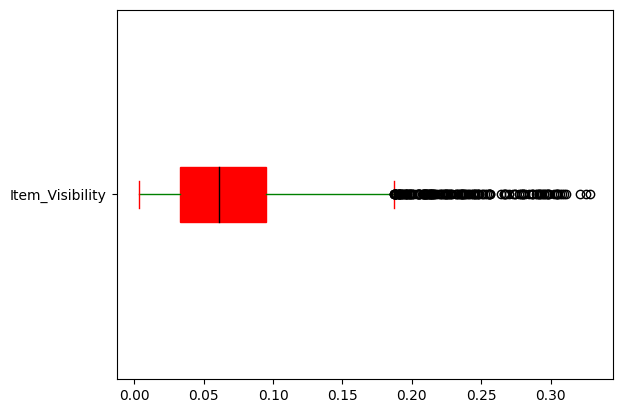

In [98]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Item_Visibility.plot.box(color=props2, patch_artist = True, vert = False)

In [99]:
IQR=df.Item_Visibility.quantile(0.75)-df.Item_Visibility.quantile(0.25)
LL=df.Item_Visibility.quantile(0.25)-(1.5*IQR)
UL=df.Item_Visibility.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)


IQR:  0.06161397400000001
LL:  -0.05933915900000001
UL:  0.18711673700000003


In [100]:
len(df.Item_Visibility[df.Item_Weight>UL])

8523

### df = df[(df[column_of_interest] > lower_bound) & (df[column_of_interest] < upper_bound)]

#### SCATTER PLOT

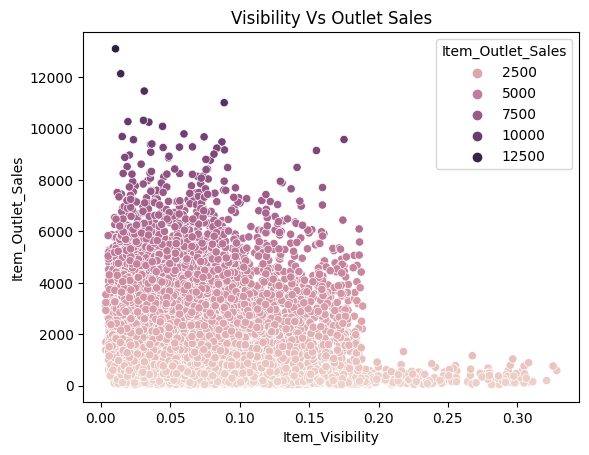

In [101]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Outlet_Sales",data=df)
plt.title("Visibility Vs Outlet Sales")
plt.show()

In [102]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food


### 5.Item_Type

In [103]:
df.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


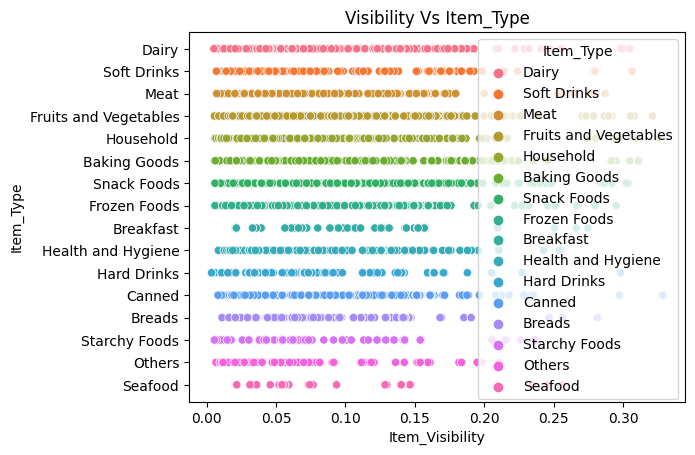

In [104]:
sns.scatterplot(x="Item_Visibility",y="Item_Type",hue="Item_Type",data=df)
plt.title("Visibility Vs Item_Type")
plt.show()

###### In the above graph we can see that item visibilty is not depending upon the item type. All the type of items have wide range of visibilities

In [105]:
id=[]
for i in range(len(df)):
    a=df.Item_Identifier[i][:2]
    id.append(a)
    
set(id)



{'DR', 'FD', 'NC'}

In [106]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food


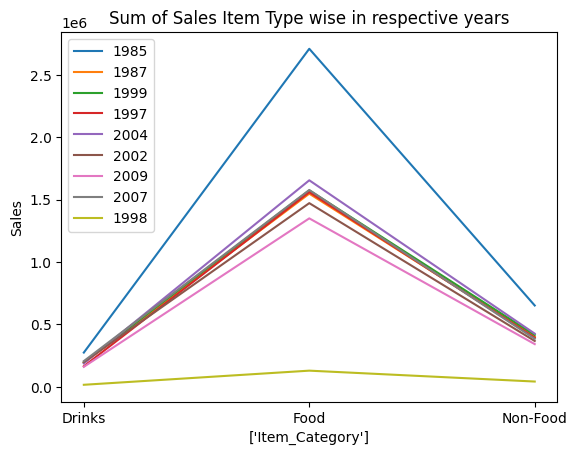

In [107]:
plt.plot(df[df.Outlet_Establishment_Year==1985].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1987].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1999].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1997].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2004].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2002].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2009].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==2007].groupby('Item_Category')['Item_Outlet_Sales'].sum())
plt.plot(df[df.Outlet_Establishment_Year==1998].groupby('Item_Category')['Item_Outlet_Sales'].sum())

plt.xlabel(['Item_Category'])
plt.ylabel('Sales')
plt.title('Sum of Sales Item Type wise in respective years')
plt.legend([1985,1987,1999,1997,2004,2002,2009,2007,1998])
plt.show()




#### COUNT PLOT

Text(0.5, 1.0, 'Item type wise counting')

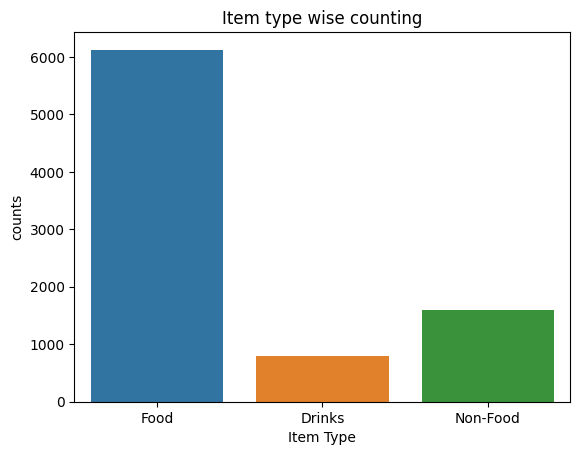

In [108]:
sns.countplot(x="Item_Category", data=df)
plt.rcParams['figure.figsize'] = [10,5]
plt.xlabel("Item Type")
plt.ylabel('counts')
plt.title("Item type wise counting")

#### PIE CHART

In [109]:
Frequency_by_Item=df["Item_Category"].value_counts()
Frequency_by_Item

Food        6125
Non-Food    1599
Drinks       799
Name: Item_Category, dtype: int64

In [110]:
keys=Frequency_by_Item.keys().to_list()
counts=Frequency_by_Item.to_list()


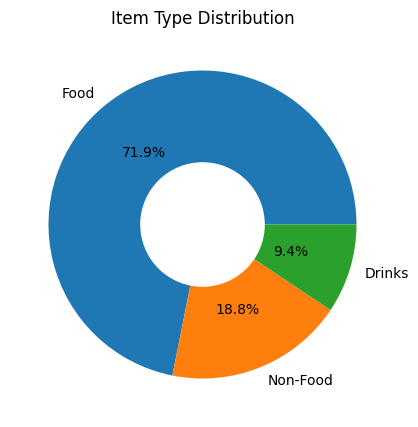

In [111]:
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Item Type Distribution")
plt.show()
        

##### Food Items are most sold item types.

### 6.Outlet_Identifier

In [112]:
df.Outlet_Identifier.describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

In [113]:
df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


#### OUT019 and OUT010 are having less outlet sales among 10 Outlet identifiers.

#### BAR PLOT

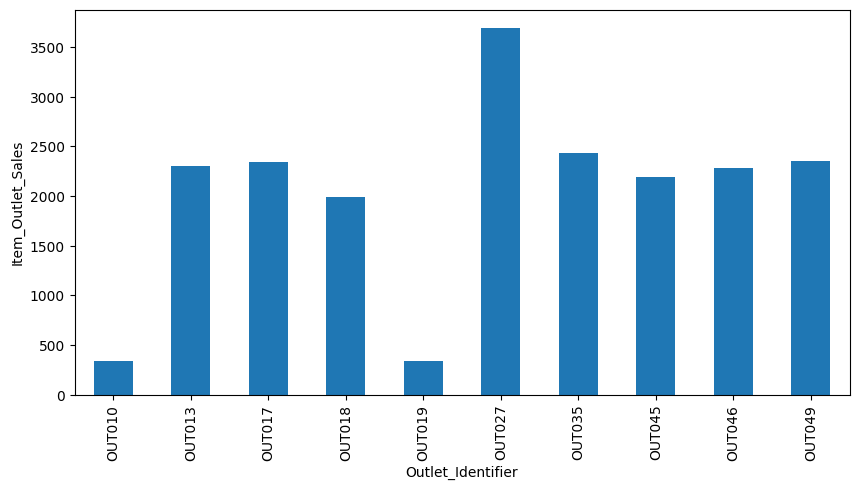

In [114]:
df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

#### COUNT PLOT

Text(0.5, 1.0, 'Outlet_Identifier counting')

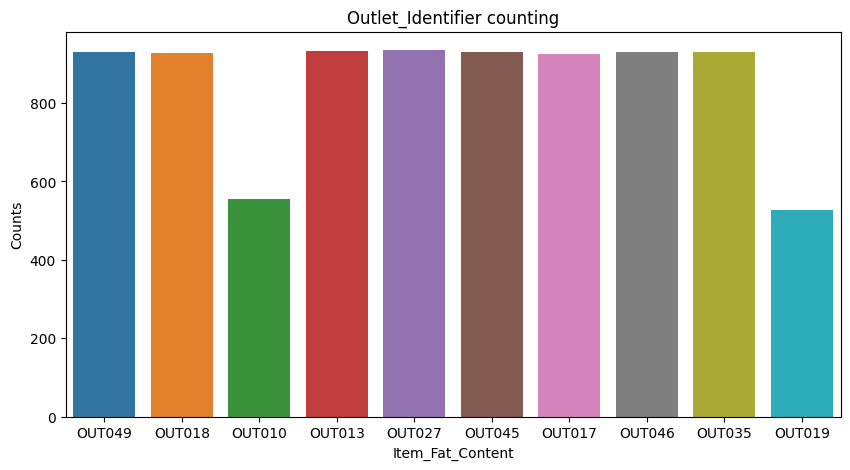

In [115]:
sns.countplot(x='Outlet_Identifier',data=df)
plt.xlabel("Item_Fat_Content")
plt.ylabel("Counts")
plt.rcParams['figure.figsize'] = [8,10]
plt.title("Outlet_Identifier counting")

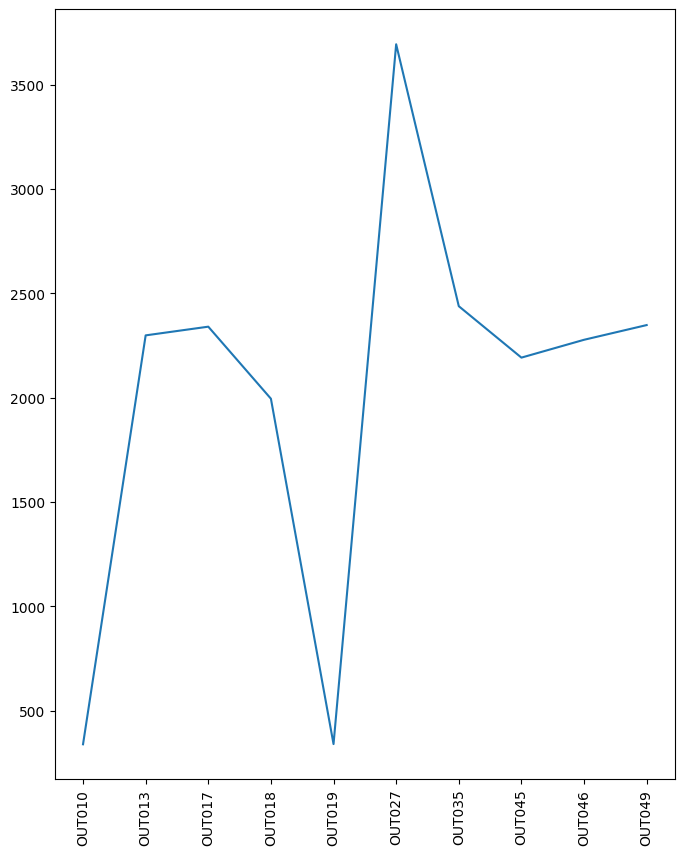

In [116]:
plt.plot(df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean())
plt.rcParams['figure.figsize'] = [5,5]
plt.xticks(rotation=90)

plt.show()

In [117]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,214.5218,1987.0,2778.3834,36.0,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,Food
8519,8.380000,0.046982,108.1570,2002.0,549.2850,21.0,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1,Food
8520,10.600000,0.035186,85.1224,2004.0,1193.1136,19.0,NCJ29,Non Consumable,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Non-Food
8521,7.210000,0.145221,103.1332,2009.0,1845.5976,14.0,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Food


### 7.Item_MRP

In [118]:
df.Item_MRP.value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

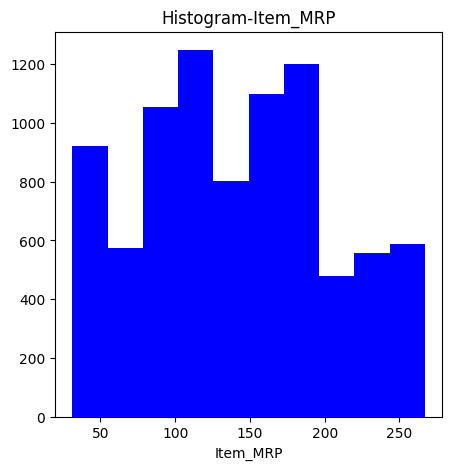

In [119]:
##Histogram
plt.hist(df.Item_MRP,color='blue')
plt.xlabel("Item_MRP")
plt.title('Histogram-Item_MRP')
plt.rcParams['figure.figsize'] = [10,5]
plt.show

#### BOX PLOT

<AxesSubplot: >

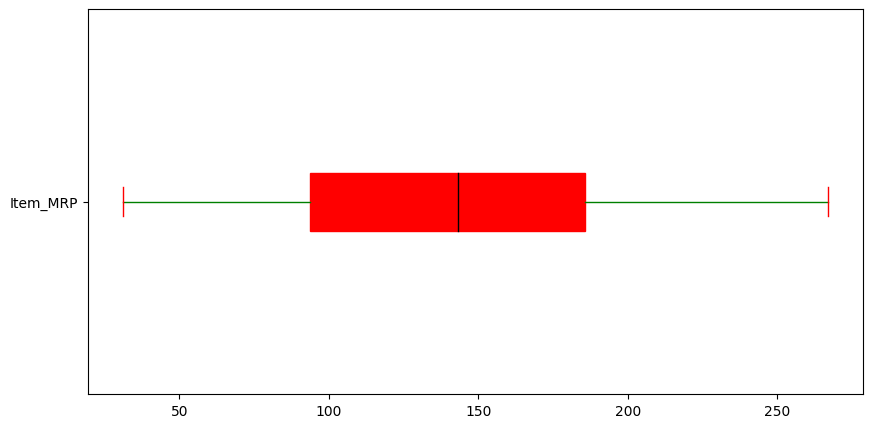

In [120]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Item_MRP.plot.box(color=props2, patch_artist = True, vert = False)

#### SCATTER PLOT

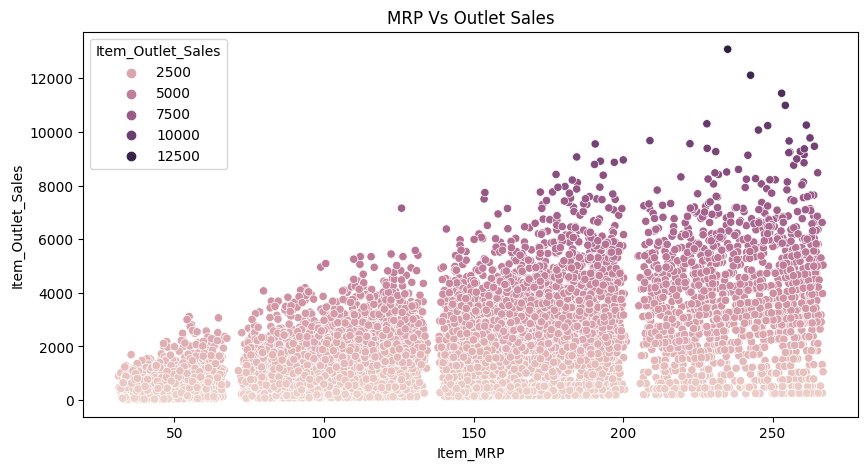

In [121]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",hue="Item_Outlet_Sales",data=df)
plt.title("MRP Vs Outlet Sales")
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

### 8.Outlet_Establishment_Year

In [122]:
df.Outlet_Establishment_Year.value_counts()

1985.0    1463
1987.0     932
1999.0     930
1997.0     930
2004.0     930
2002.0     929
2009.0     928
2007.0     926
1998.0     555
Name: Outlet_Establishment_Year, dtype: int64

In [123]:
df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985.0,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987.0,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997.0,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998.0,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999.0,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002.0,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004.0,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007.0,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009.0,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


#### Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

In [124]:
df.Outlet_Establishment_Year.describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

#### BOX PLOT

<AxesSubplot: >

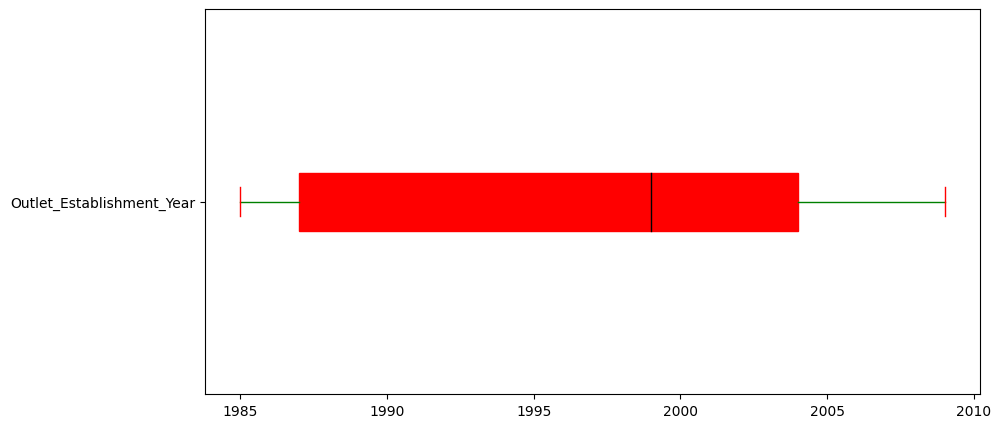

In [125]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Outlet_Establishment_Year.plot.box(color=props2, patch_artist = True, vert = False)

#### COUNT PLOT

Text(0.5, 1.0, 'Outlet_Establishment_Year counting')

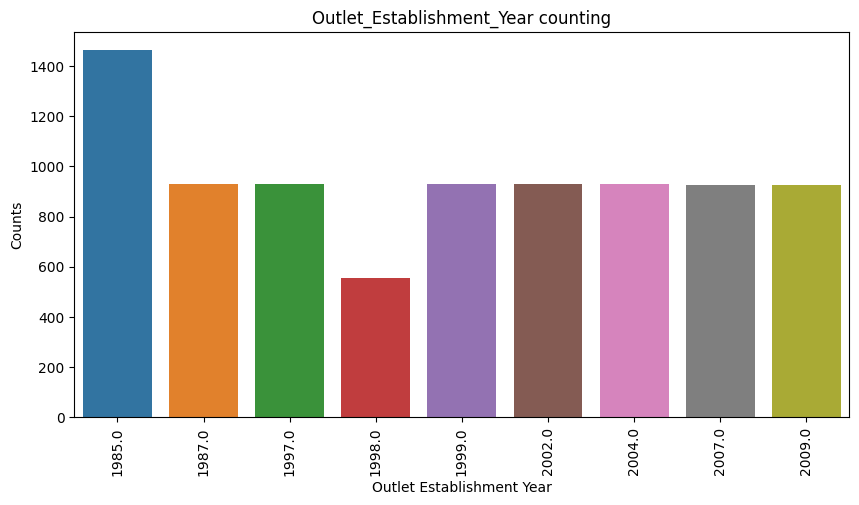

In [126]:
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.xlabel("Outlet Establishment Year")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [5,3]
plt.title("Outlet_Establishment_Year counting")

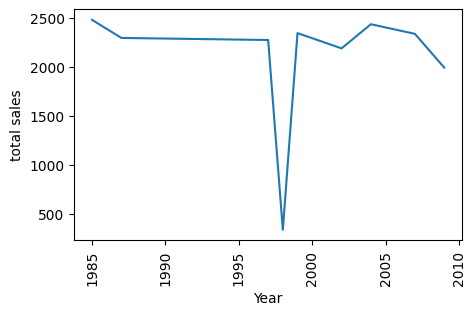

In [127]:
plt.plot(df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean())
plt.rcParams['figure.figsize'] = [5,4]
plt.xlabel('Year')
plt.ylabel('total sales')
plt.xticks(rotation=90)

plt.show()

In [128]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Food


Text(0.5, 1.0, 'Outlet_Years counting')

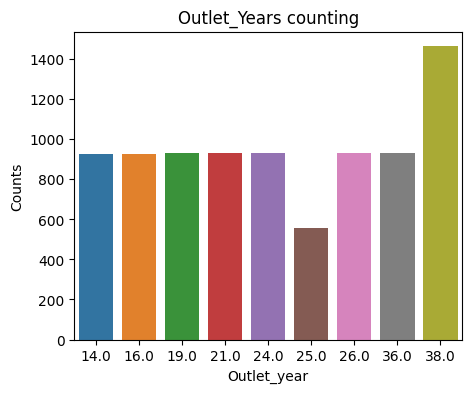

In [129]:
sns.countplot(x='Outlet_year',data=df)
plt.xlabel("Outlet_year")
plt.ylabel('Counts')
plt.rcParams['figure.figsize'] = [5,10]
plt.title("Outlet_Years counting")

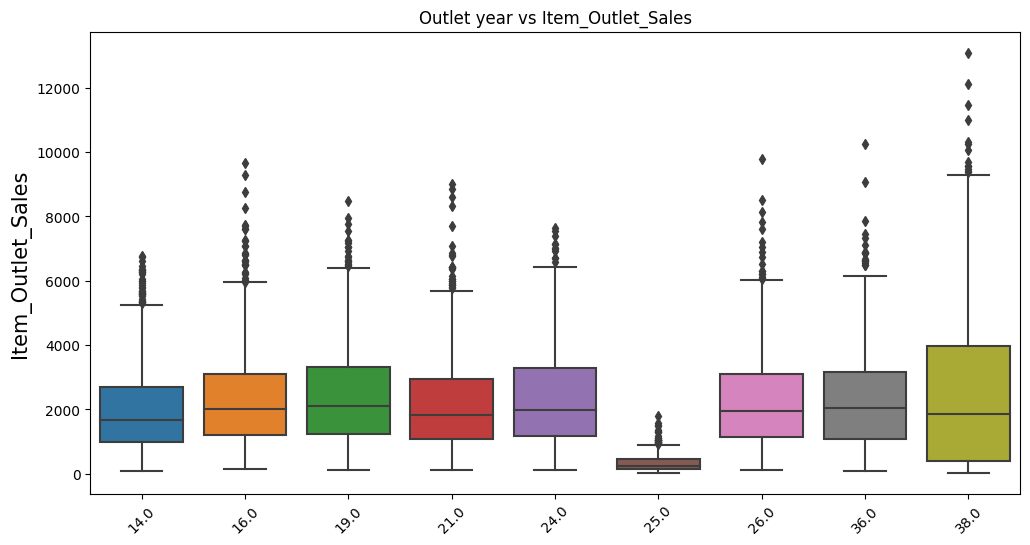

In [130]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_year', y = 'Item_Outlet_Sales', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet year vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()


In [131]:
df.Outlet_Size.value_counts()
df.Outlet_Size.describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

### 9.Outlet_Size

In [132]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.664,3166.37835,10256.6490
Medium,5203.0,2283.730470,1776.135246,33.2900,916.14080,1850.924,3207.15860,13086.9648
Small,2388.0,1912.149161,1582.370364,33.9558,601.05095,1544.656,2824.32360,9779.9362


#### BAR PLOT

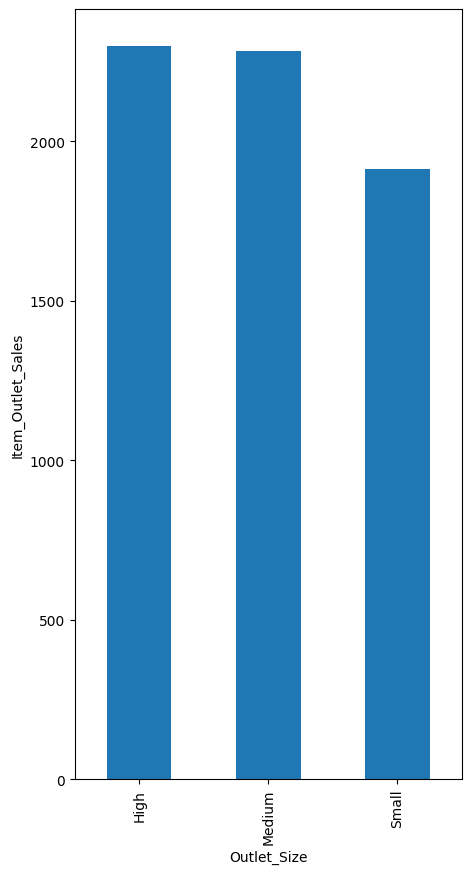

In [133]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.rcParams['figure.figsize']=[4,4]
plt.show()


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   float64
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Outlet_year                8523 non-null   float64
 6   Item_Identifier            8523 non-null   object 
 7   Item_Fat_Content           8523 non-null   object 
 8   Item_Type                  8523 non-null   object 
 9   Outlet_Identifier          8523 non-null   object 
 10  Outlet_Size                8523 non-null   object 
 11  Outlet_Location_Type       8523 non-null   object 
 12  Outlet_Type                8523 non-null   object 
 13  Item_Category              8523 non-null   objec

### 10.Outlet_Location_Type

In [135]:
df.Outlet_Location_Type.describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

In [136]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [137]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Location_Type,,,,,,,,
Tier 1,2388.0,1876.909159,1561.649293,33.9558,593.72715,1487.3972,2803.0180,9779.9362
Tier 2,2785.0,2323.990559,1520.543543,99.8700,1171.80800,2004.0580,3110.6176,9664.7528
Tier 3,3350.0,2279.627651,1912.451333,33.2900,731.38130,1812.3076,3307.6944,13086.9648


In [138]:
df.Outlet_Location_Type.describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

#### BAR PLOT

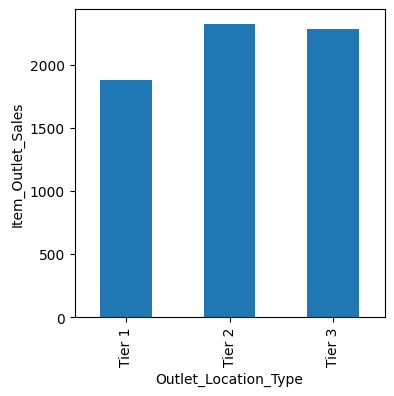

In [139]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()
plt.rcParams['figure.figsize']=[1,2]

### 11.Outlet_Type

In [140]:
df.Outlet_Type.describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

In [141]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [142]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [143]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].median()

Outlet_Type
Grocery Store         256.9988
Supermarket Type1    1990.7420
Supermarket Type2    1655.1788
Supermarket Type3    3364.9532
Name: Item_Outlet_Sales, dtype: float64

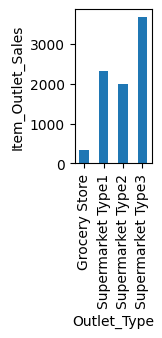

In [144]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()
plt.rcParams['figure.figsize']=[5,3]

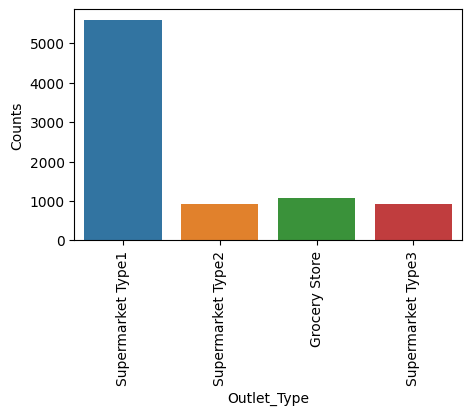

In [145]:
sns.countplot(x='Outlet_Type',data=df)
plt.xlabel("Outlet_Type")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()
plt.rcParams['figure.figsize']=[6,3]

#### BOX PLOT OF Outlet_Size,Outlet_Location_Type,Outlet_Type WITH Item_Outlet_Sales

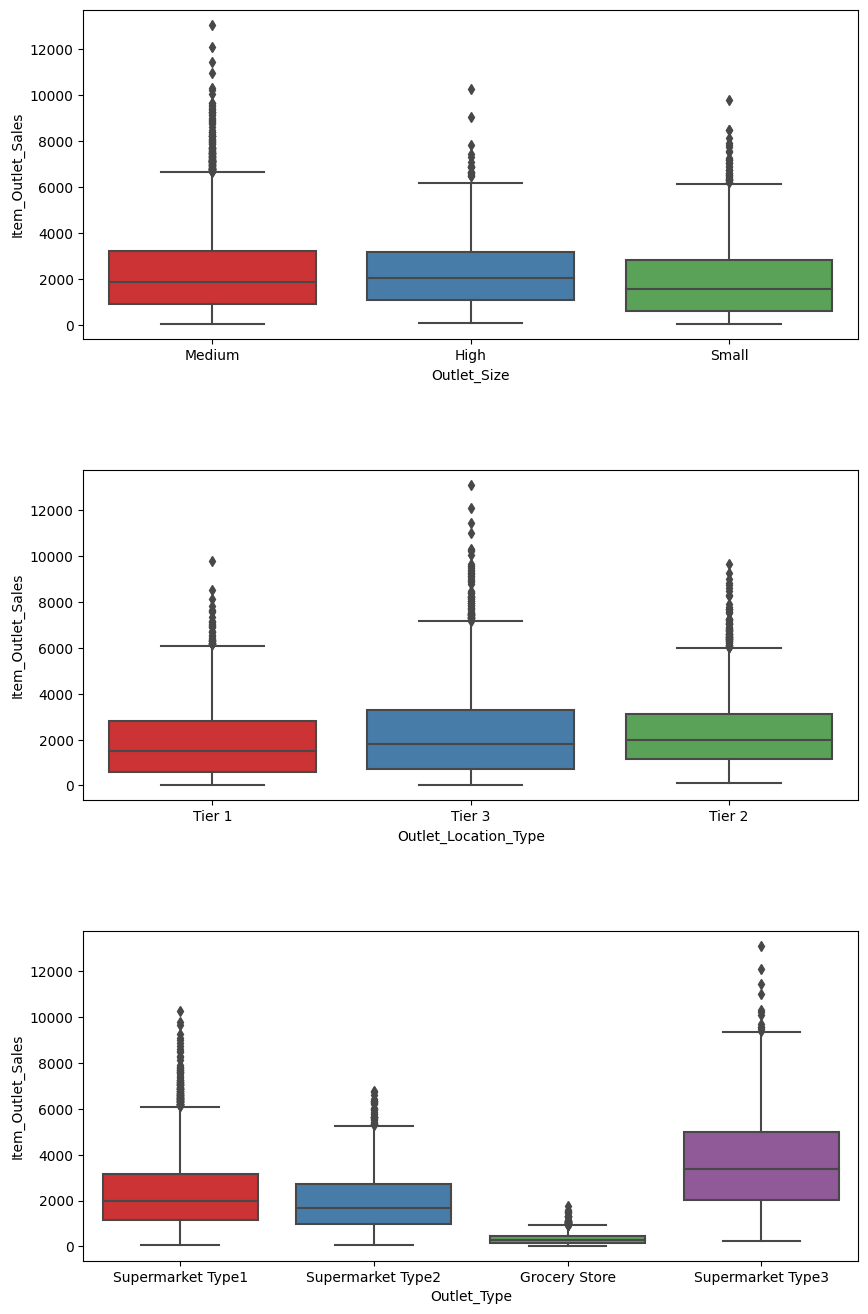

In [146]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()


In [147]:
df['Outlet_Size']=df['Outlet_Size'].\
replace(['Medium','Small'],['MS Combined Size','MS Combined Size'])

In [148]:
df.Outlet_Size.value_counts()

MS Combined Size    7591
High                 932
Name: Outlet_Size, dtype: int64

In [149]:
df['Outlet_Location_Type']= df['Outlet_Location_Type'].\
replace(['Tier 1','Tier 3'],['1,3 Combined Tier','1,3 Combined Tier'])

In [150]:
df.Outlet_Location_Type.value_counts()

1,3 Combined Tier    5738
Tier 2               2785
Name: Outlet_Location_Type, dtype: int64

In [151]:
df['Outlet_Type'] =df['Outlet_Type'].\
replace(['Supermarket Type1','Supermarket Type2'],['1,2 Combined Type','1,2 Combined Type'])


In [152]:
df.Outlet_Type.value_counts()

1,2 Combined Type    6505
Grocery Store        1083
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

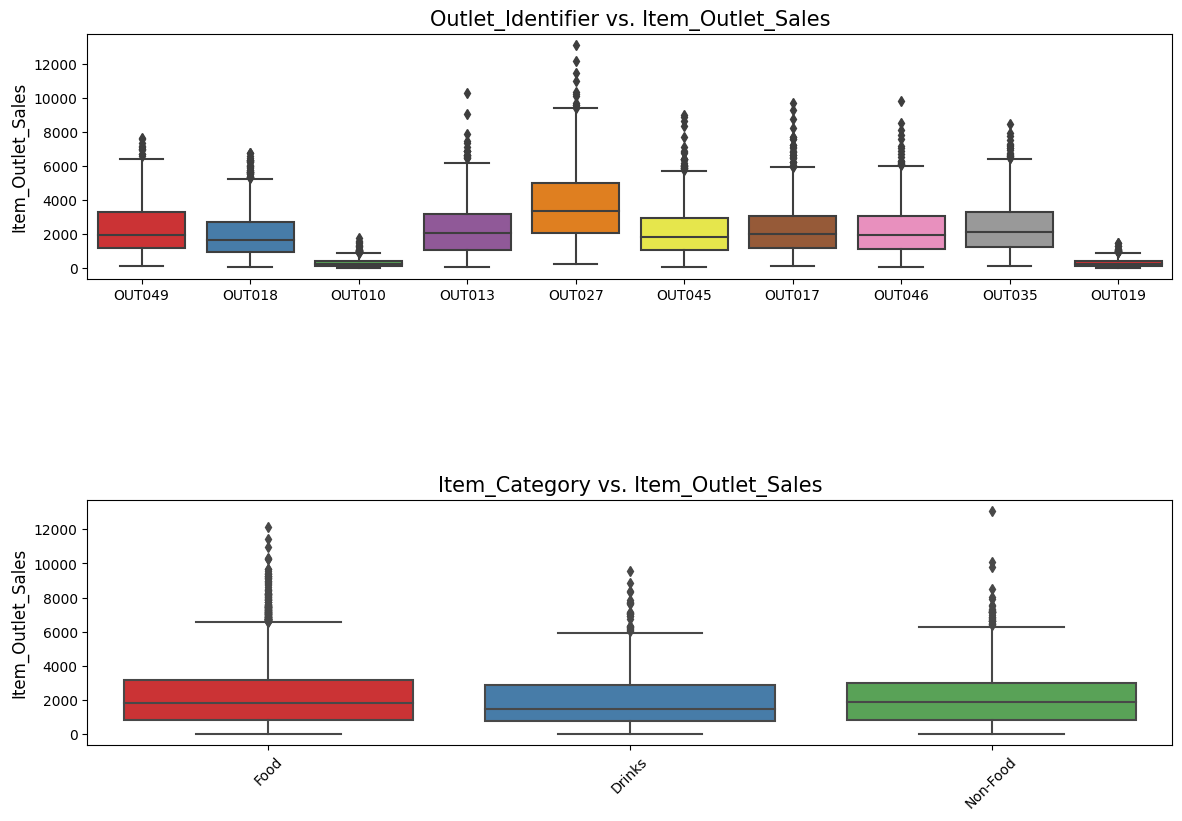

In [153]:

plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Category', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_title("Item_Category vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [154]:
cormat=df.corr()
cormat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year
Item_Weight,1.000000,-0.017904,0.030017,-0.010255,0.013170,0.010255
Item_Visibility,-0.017904,1.000000,-0.006143,-0.083099,-0.142924,0.083099
Item_MRP,0.030017,-0.006143,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.010255,-0.083099,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.013170,-0.142924,0.567574,-0.049135,1.000000,0.049135
Outlet_year,0.010255,0.083099,-0.005020,-1.000000,0.049135,1.000000


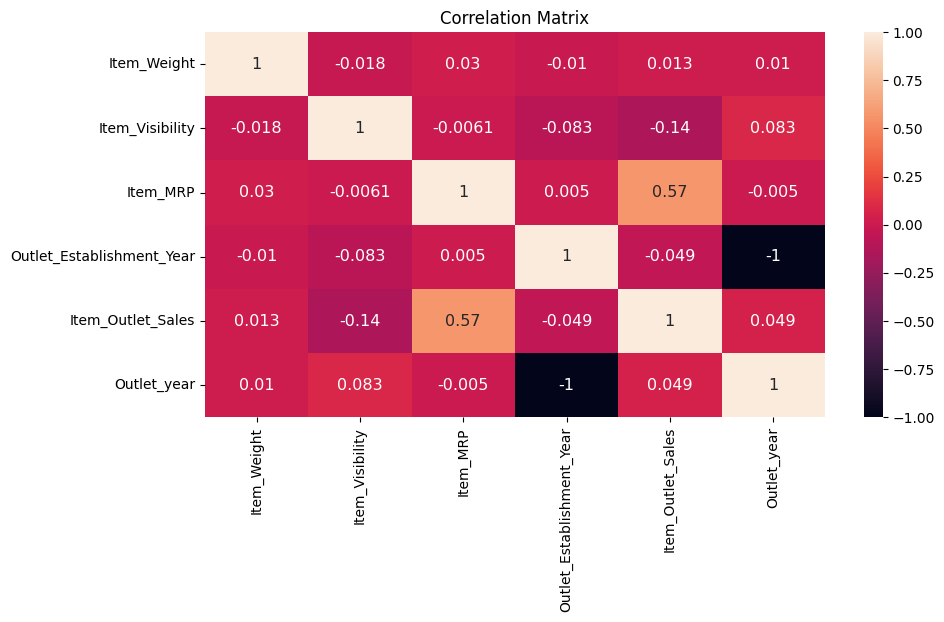

In [155]:
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(cormat,annot=True,vmax=+1,vmin=-1,annot_kws={"size":11.5})
plt.title("Correlation Matrix")
plt.show()

In [156]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,9.300000,0.016047,249.8092,1999.0,3735.1380,24.0,FDA15,Low Fat,Dairy,OUT049,MS Combined Size,"1,3 Combined Tier","1,2 Combined Type",Food
1,5.920000,0.019278,48.2692,2009.0,443.4228,14.0,DRC01,Regular,Soft Drinks,OUT018,MS Combined Size,"1,3 Combined Tier","1,2 Combined Type",Drinks
2,17.500000,0.016760,141.6180,1999.0,2097.2700,24.0,FDN15,Low Fat,Meat,OUT049,MS Combined Size,"1,3 Combined Tier","1,2 Combined Type",Food
3,12.822976,0.082914,182.0950,1998.0,732.3800,25.0,FDX07,Regular,Fruits and Vegetables,OUT010,MS Combined Size,"1,3 Combined Tier",Grocery Store,Food
4,13.690722,0.075519,53.8614,1987.0,994.7052,36.0,NCD19,Non Consumable,Household,OUT013,High,"1,3 Combined Tier","1,2 Combined Type",Non-Food


In [157]:
DF=df.copy()

In [158]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   float64
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Outlet_year                8523 non-null   float64
 6   Item_Identifier            8523 non-null   object 
 7   Item_Fat_Content           8523 non-null   object 
 8   Item_Type                  8523 non-null   object 
 9   Outlet_Identifier          8523 non-null   object 
 10  Outlet_Size                8523 non-null   object 
 11  Outlet_Location_Type       8523 non-null   object 
 12  Outlet_Type                8523 non-null   object 
 13  Item_Category              8523 non-null   objec

In [159]:
DF.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

In [160]:
numerical_variables=DF.select_dtypes(include=np.number)
numerical_variables

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year
0,9.300000,0.016047,249.8092,3735.1380,24.0
1,5.920000,0.019278,48.2692,443.4228,14.0
2,17.500000,0.016760,141.6180,2097.2700,24.0
3,12.822976,0.082914,182.0950,732.3800,25.0
4,13.690722,0.075519,53.8614,994.7052,36.0
...,...,...,...,...,...
8518,6.865000,0.056783,214.5218,2778.3834,36.0
8519,8.380000,0.046982,108.1570,549.2850,21.0
8520,10.600000,0.035186,85.1224,1193.1136,19.0
8521,7.210000,0.145221,103.1332,1845.5976,14.0


In [161]:
numerical_variables.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_year'],
      dtype='object')

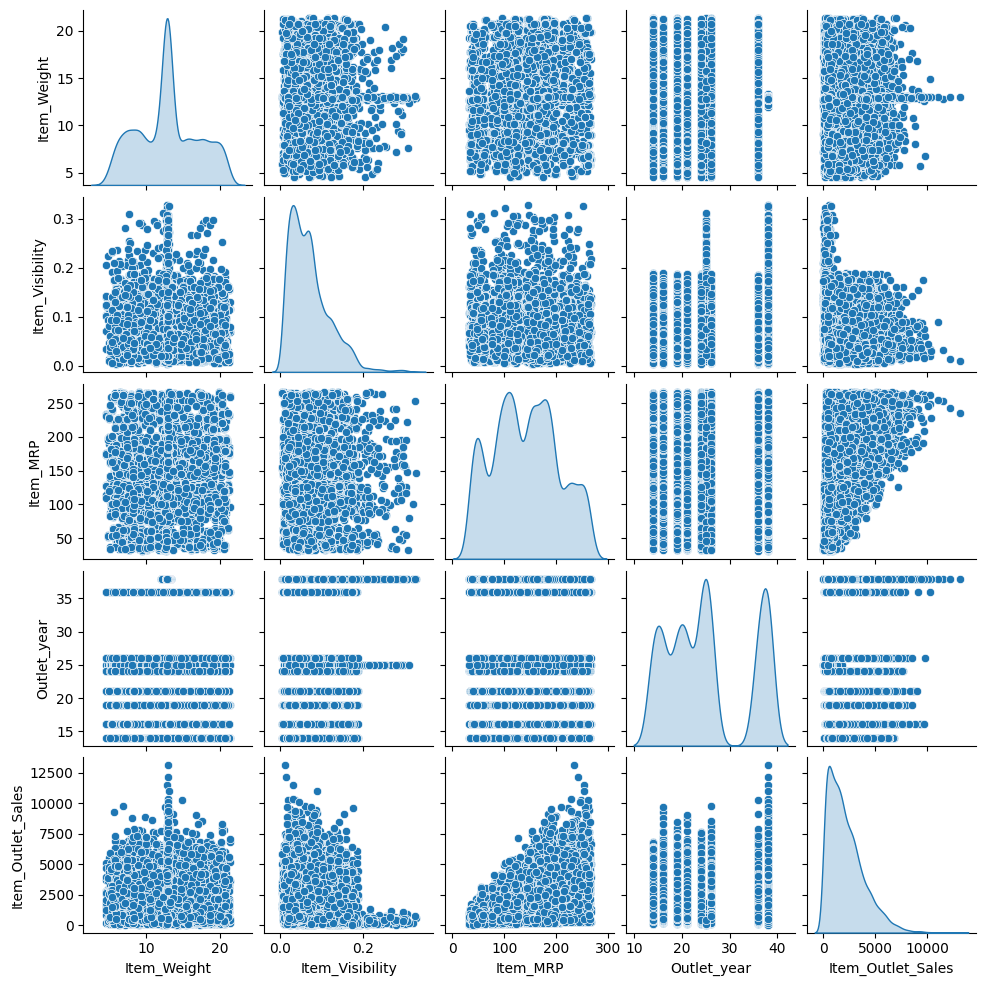

In [162]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_year", "Item_Outlet_Sales"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(DF[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

In [163]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [164]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

Seperating numerical and categorical variables

In [165]:
numerical_variables=DF.select_dtypes(include=np.number)
numerical_variables.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_year'],
      dtype='object')

In [166]:
categorical_variables=DF.select_dtypes(include='object')
categorical_variables.columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Category'],
      dtype='object')

In [167]:
dummy_enc_cat=pd.get_dummies(categorical_variables,drop_first=True)

In [168]:
dummy_enc_cat

,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Size_MS Combined Size,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,1,0
3,0,1,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,1,0
8519,0,1,1,1,0,0,1,0
8520,1,0,1,1,0,0,0,1
8521,0,1,1,0,0,0,1,0


In [169]:
dummy_enc_cat.shape

(8523, 8)

In [170]:
dummy_sales_df=pd.concat([numerical_variables,dummy_enc_cat],axis=1)

In [171]:
dummy_sales_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Size_MS Combined Size,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.300000,0.016047,249.8092,3735.1380,24.0,0,0,1,0,0,0,1,0
1,5.920000,0.019278,48.2692,443.4228,14.0,0,1,1,0,0,0,0,0
2,17.500000,0.016760,141.6180,2097.2700,24.0,0,0,1,0,0,0,1,0
3,12.822976,0.082914,182.0950,732.3800,25.0,0,1,1,0,1,0,1,0
4,13.690722,0.075519,53.8614,994.7052,36.0,1,0,0,0,0,0,0,1


In [172]:
dummy_sales_df.shape


(8523, 13)

In [173]:
dummy_sales_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Size_MS Combined Size,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,9.300000,0.016047,249.8092,3735.1380,24.0,0,0,1,0,0,0,1,0
1,5.920000,0.019278,48.2692,443.4228,14.0,0,1,1,0,0,0,0,0
2,17.500000,0.016760,141.6180,2097.2700,24.0,0,0,1,0,0,0,1,0
3,12.822976,0.082914,182.0950,732.3800,25.0,0,1,1,0,1,0,1,0
4,13.690722,0.075519,53.8614,994.7052,36.0,1,0,0,0,0,0,0,1


In [174]:
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Outlet_year                      8523 non-null   float64
 5   Item_Fat_Content_Non Consumable  8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Outlet_Size_MS Combined Size     8523 non-null   uint8  
 8   Outlet_Location_Type_Tier 2      8523 non-null   uint8  
 9   Outlet_Type_Grocery Store        8523 non-null   uint8  
 10  Outlet_Type_Supermarket Type3    8523 non-null   uint8  
 11  Item_Category_Food               8523 non-null   uint8  
 12  Item_Category_Non-Fo

### applying log transformation to target variable

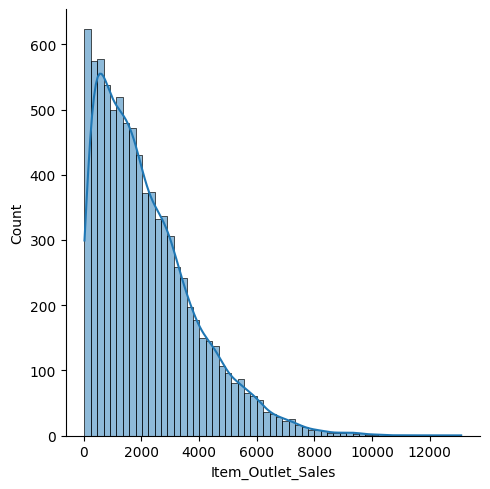

In [175]:
sns.displot(x='Item_Outlet_Sales', kde=True,data=dummy_sales_df)
plt.show()

In [176]:
dummy_sales_df['log_sales'] = np.log(dummy_sales_df['Item_Outlet_Sales'])

In [177]:
dummy_sales_df['log_sales']

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: log_sales, Length: 8523, dtype: float64

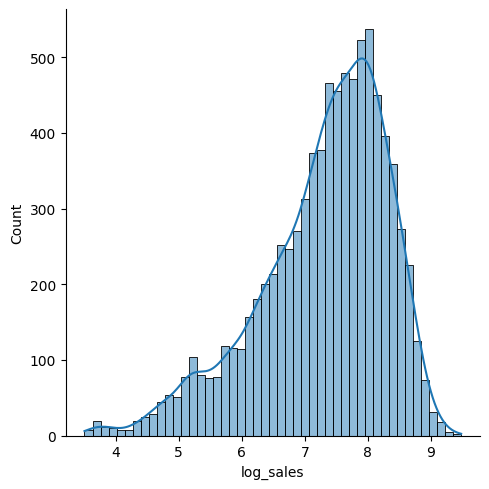

In [178]:
sns.displot(x='log_sales', kde=True,data=dummy_sales_df)
plt.show()

## Model Building

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [180]:
knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

## Splitting Train and Test data

In [181]:
X = dummy_sales_df.drop(['Item_Outlet_Sales', 'log_sales'], axis=1)
y = dummy_sales_df[['Item_Outlet_Sales', 'log_sales']]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y['log_sales'], test_size = .20, random_state = 1)


## LinearRegression

In [183]:
lr = LinearRegression()

In [184]:
lr.fit(X_train, y_train)

LinearRegression()

In [185]:
log_tr_pred = np.exp(lr.predict(X_train))
log_test_pred = np.exp(lr.predict(X_test))

In [186]:
act_y_train = y.loc[y_train.index, 'Item_Outlet_Sales']

In [187]:
lr.train_score="Train R2 Score: ", round(r2_score(log_tr_pred, act_y_train)*100,2)
lr.train_score

('Train R2 Score: ', 31.19)

In [188]:
print("Train RMSE :", round(np.sqrt(mean_squared_error(log_tr_pred, act_y_train)),2))

Train RMSE : 1139.23


In [189]:
act_y_test = y.loc[y_test.index, 'Item_Outlet_Sales']

In [190]:
lr.test_score=("Test R2 Score: ", round(r2_score(log_test_pred, act_y_test)*100,2))
print(lr.test_score)
print("Test RMSE :", round(np.sqrt(mean_squared_error(log_test_pred, act_y_test)),2))


('Test R2 Score: ', 30.19)
Test RMSE : 1159.92


## AdaBoostRegressor

In [191]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_train, y_train)



AdaBoostRegressor(learning_rate=0.01)

In [192]:
ada.train_pred=(ada.predict(X_train))
ada.test_pred=(ada.predict(X_test))

ada.train_score=r2_score(y_train,ada.train_pred)
print('train accuracy=',ada.train_score)

ada.test_score=(r2_score(y_test,ada.test_pred))
print('test accuracy=', ada.test_score)



train accuracy= 0.6947540543268249
test accuracy= 0.7121106601250711


## GradientBoostingRegressor

In [193]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=80, learning_rate =.2)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=80)

In [194]:
gbr.train_pred=gbr.predict(X_train)
gbr.test_pred=gbr.predict(X_test)

gbr.train_score=r2_score(y_train,gbr.train_pred)
print('train accuracy=',gbr.train_score)

gbr.test_score=r2_score(y_test,gbr.test_pred)
print('test accuracy=', gbr.test_score)


train accuracy= 0.7497380352496116
test accuracy= 0.7477567132571575


## DecisionTreeRegressor

In [195]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [196]:
dt.train_pred=dt.predict(X_train)
dt.test_pred=dt.predict(X_test)

dt.train_score=r2_score(y_train,dt.train_pred)
print('train accuracy=',dt.train_score)

dt.test_score=r2_score(y_test,dt.test_pred)
print('test accuracy=', dt.test_score)


train accuracy= 0.689329298267336
test accuracy= 0.7057684124817032


## RandomForestRegressor

In [197]:
rf = RandomForestRegressor(max_depth = 4,max_features='auto', n_estimators=500)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=500)

In [198]:
rf.train_pred=rf.predict(X_train)
rf.test_pred=rf.predict(X_test)

rf.train_score=r2_score(y_train,rf.train_pred)
print('train accuracy=',rf.train_score)

rf.test_score=r2_score(y_test,rf.test_pred)
print('test accuracy=', rf.test_score)


train accuracy= 0.730533854471092
test accuracy= 0.7391091890207087


## let us staderdize the data and build model for better accuracy

In [199]:
## Let us scale the data before building the model

scale = StandardScaler()

In [200]:
X_Scaled = scale.fit_transform(X)

In [201]:
X_Scaled_df = pd.DataFrame(X_Scaled, columns = X.columns)

In [202]:
X_Scaled_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_year,Item_Fat_Content_Non Consumable,Item_Fat_Content_Regular,Outlet_Size_MS Combined Size,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Food
0,-0.872794,-1.115092,1.747454,-0.139541,-0.480558,-0.738147,0.350395,-0.696678,-0.381529,-0.351028,0.625708,-0.480558
1,-1.698145,-1.048863,-1.489023,-1.334103,-0.480558,1.354743,0.350395,-0.696678,-0.381529,-0.351028,-1.598190,-0.480558
2,1.129535,-1.100481,0.010040,-0.139541,-0.480558,-0.738147,0.350395,-0.696678,-0.381529,-0.351028,0.625708,-0.480558
3,-0.012531,0.255584,0.660050,-0.020085,-0.480558,1.354743,0.350395,-0.696678,2.621031,-0.351028,0.625708,-0.480558
4,0.199361,0.103999,-1.399220,1.293934,2.080915,-0.738147,-2.853918,-0.696678,-0.381529,-0.351028,-1.598190,2.080915


In [203]:
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_Scaled_df, y['log_sales'], test_size=0.2, random_state=1)

## LinearRegression

In [204]:
lr.fit(X_sc_train, y_sc_train)

LinearRegression()

In [205]:
tr_scaled_pred = np.exp(lr.predict(X_sc_train))
test_scaled_pred = np.exp(lr.predict(X_sc_test))

In [206]:
act_y_train = y.loc[y_sc_train.index, 'Item_Outlet_Sales']
act_y_test = y.loc[y_sc_test.index, 'Item_Outlet_Sales']

In [207]:
lr.train_score= round(r2_score(log_tr_pred, act_y_train),2)
lr.train_score

0.31

In [208]:
lr.test_score=(round(r2_score(log_test_pred, act_y_test),2))
print(lr.test_score)
print(round(np.sqrt(mean_squared_error(log_test_pred, act_y_test)),2))


0.3
1159.92


## GradientBoostingRegressor

In [209]:
gbr.fit(X_sc_train,y_sc_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=80)

In [210]:
gbr.train_pred=gbr.predict(X_sc_train)
gbr.test_pred=gbr.predict(X_sc_test)

gbr.train_score=r2_score(y_sc_train,gbr.train_pred)
print('train accuracy=',gbr.train_score)

gbr.test_score=r2_score(y_sc_test,gbr.test_pred)
print('test accuracy=', gbr.test_score)


train accuracy= 0.7497380352496116
test accuracy= 0.7475840349636786


## KNeighborsRegressor

In [211]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_sc_train,y_sc_train)

KNeighborsRegressor(n_neighbors=20)

In [212]:
knn.train_pred=knn.predict(X_sc_train)
knn.test_pred=knn.predict(X_sc_test)

knn.train_score=r2_score(y_train,knn.train_pred)
print('train accuracy=',knn.train_score)

knn.test_score=r2_score(y_test,knn.test_pred)
print('test accuracy=', knn.test_score)


train accuracy= 0.7325315710711733
test accuracy= 0.7069791704574308


## AdaBoostRegressor

In [213]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(X_sc_train, y_sc_train)



AdaBoostRegressor(learning_rate=0.01)

In [214]:
ada.train_pred=(ada.predict(X_sc_train))
ada.test_pred=(ada.predict(X_sc_test))

ada.train_score=r2_score(y_sc_train,ada.train_pred)
print('train accuracy=',ada.train_score)

ada.test_score=(r2_score(y_sc_test,ada.test_pred))
print('test accuracy=', ada.test_score)



train accuracy= 0.6941831220235026
test accuracy= 0.7105981965441248


## DecisionTreeRegressor

In [215]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_sc_train,y_sc_train)

dt.train_pred=dt.predict(X_sc_train)
dt.test_pred=dt.predict(X_sc_test)

dt.train_score=r2_score(y_sc_train,dt.train_pred)
print('train accuracy=',dt.train_score)

dt.test_score=r2_score(y_test,dt.test_pred)
print('test accuracy=', dt.test_score)


train accuracy= 0.689329298267336
test accuracy= 0.7057684124817032


## RandomForestRegressor

In [216]:
rf = RandomForestRegressor(max_depth = 4,max_features='auto', n_estimators=500)
rf.fit(X_sc_train,y_sc_train)

RandomForestRegressor(max_depth=4, n_estimators=500)

In [217]:
rf.train_pred=rf.predict(X_sc_train)
rf.test_pred=rf.predict(X_sc_test)

rf.train_score=r2_score(y_sc_train,rf.train_pred)
print('train accuracy=',rf.train_score)

rf.test_score=r2_score(y_sc_test,rf.test_pred)
print('test accuracy=', rf.test_score)


train accuracy= 0.7308279696541646
test accuracy= 0.7393231093909143


In [218]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'Train R Square': [lr.train_score, knn.train_score, dt.train_score,rf.train_score,ada.train_score,gbr.train_score],
                'Test R Square':[lr.test_score,knn.test_score,dt.test_score,rf.test_score,ada.test_score,gbr.test_score]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,Train R Square,Test R Square
0,linear Regression,0.310000,0.300000
1,KNeighbors,0.732532,0.706979
2,Decision Tree,0.689329,0.705768
3,RandomForest,0.730828,0.739323
4,AdaBoost,0.694183,0.710598
5,GradientBoosting,0.749738,0.747584


In [219]:
import joblib

In [220]:
joblib.dump(gbr,r'C:\Users\admin\Desktop\notebook1\ml\suhas Store-Sales-Prediction-main\pycharm files\models\lr.sav')

['C:\\Users\\admin\\Desktop\\notebook1\\ml\\suhas Store-Sales-Prediction-main\\pycharm files\\models\\lr.sav']

In [221]:
joblib.dump(sc,r'C:\Users\admin\Desktop\notebook1\ml\suhas Store-Sales-Prediction-main\pycharm files\models\sc.sav')

NameError: name 'sc' is not defined